In [2]:
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 7.5 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=dbf7bcb64c3c1c231f1bf885707279e6e96b2946ae60fb3fdaaa08818a04604f
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


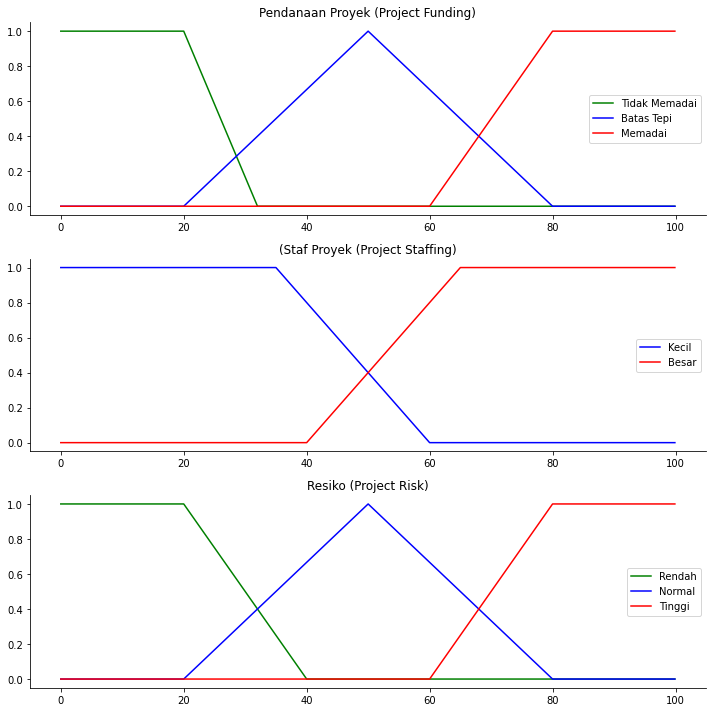

In [10]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
%matplotlib inline

# universe variables

x_qual = np.arange(0, 100, 0.1)
x_serv = np.arange(0, 100, 0.1)
x_tip  = np.arange(0, 100, 0.1)

# fuzzy membership functions
qual_lo = fuzz.trapmf(x_qual, [0, 0, 20, 32])
qual_md = fuzz.trimf(x_qual, [20, 50, 80])
qual_hi = fuzz.trapmf(x_qual, [60, 80, 100, 100])

serv_lo = fuzz.trapmf(x_serv, [0, 0, 35, 60])
serv_md = fuzz.trapmf(x_serv, [40 ,65, 100, 100])

tip_lo = fuzz.trapmf(x_tip, [0, 0, 20, 40])
tip_md = fuzz.trimf(x_tip, [20, 50, 80])
tip_hi = fuzz.trapmf(x_tip, [60, 80, 100, 100])

# Tampilkan universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(10, 10))

ax0.plot(x_qual, qual_lo, 'g', linewidth=1.5, label='Tidak Memadai')
ax0.plot(x_qual, qual_md, 'b', linewidth=1.5, label='Batas Tepi')
ax0.plot(x_qual, qual_hi, 'r', linewidth=1.5, label='Memadai')
ax0.set_title('Pendanaan Proyek (Project Funding)')
ax0.legend()

ax1.plot(x_serv, serv_lo, 'b', linewidth=1.5, label='Kecil')
ax1.plot(x_serv, serv_md, 'r', linewidth=1.5, label='Besar')
ax1.set_title('(Staf Proyek (Project Staffing)')
ax1.legend()

ax2.plot(x_tip, tip_lo, 'g', linewidth=1.5, label='Rendah')
ax2.plot(x_tip, tip_md, 'b', linewidth=1.5, label='Normal')
ax2.plot(x_tip, tip_hi, 'r', linewidth=1.5, label='Tinggi')
ax2.set_title('Resiko (Project Risk)')
ax2.legend()


for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

A
0.5
0.2
0.0
B
0.1
0.7


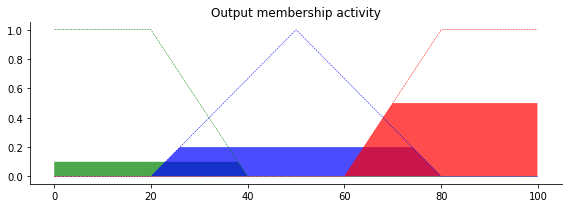

In [12]:
# Input Tegas

Avalue = 26
Bvalue = 57.5

qual_level_lo = fuzz.interp_membership(x_qual, qual_lo, Avalue)
qual_level_md = fuzz.interp_membership(x_qual, qual_md, Avalue)
qual_level_hi = fuzz.interp_membership(x_qual, qual_hi, Avalue)

serv_level_lo = fuzz.interp_membership(x_serv, serv_lo, Bvalue )
serv_level_md = fuzz.interp_membership(x_serv, serv_md, Bvalue )
print("A")
print(qual_level_lo)
print(qual_level_md)
print(qual_level_hi)
print("B")
print(serv_level_lo)
print(serv_level_md)

# Rules 
active_rule1 = np.fmax(qual_level_hi, serv_level_lo)
tip_activation_lo = np.fmin(active_rule1, tip_lo)  
active_rule2 = np.fmin(qual_level_md, serv_level_md) 
tip_activation_md = np.fmin(active_rule2, tip_md)
tip_activation_hi = np.fmin(qual_level_lo, tip_hi) 
tip0 = np.zeros_like(x_tip)

# Plot
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_tip, tip0, tip_activation_lo, facecolor='g', alpha=0.7)
ax0.plot(x_tip, tip_lo, 'g', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_tip, tip0, tip_activation_md, facecolor='b', alpha=0.7)
ax0.plot(x_tip, tip_md, 'b', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, tip_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')


for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

1000


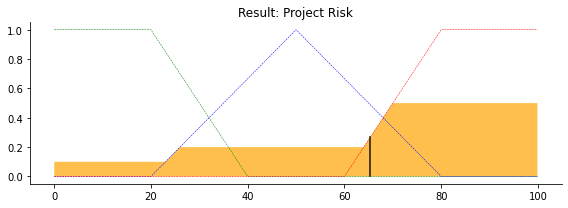

In [9]:
# Defazzification
aggregated = np.fmax(tip_activation_lo,
                     np.fmax(tip_activation_md, tip_activation_hi))

print(len(aggregated))
# Calculate defuzzified result
tip = fuzz.defuzz(x_tip, aggregated, 'centroid')
tip_activation = fuzz.interp_membership(x_tip, aggregated, tip)  # for plot

# Tampilkan
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_tip, tip_lo, 'g', linewidth=0.5, linestyle='--', )
ax0.plot(x_tip, tip_md, 'b', linewidth=0.5, linestyle='--')
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([tip, tip], [0, tip_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Result: Project Risk')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
output=tip